## MICS Internship - Felipe Moret & Ioane Toke

## Analyzing Deterioration of MLE Parameters' Estimation in $\delta$-time truncated Hawkes Processes

In [161]:
import sys
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=sys.maxsize)

**Obtaning Results for Both Methods - Whittle and MLE**

In [2]:
results_both_methods = pd.read_csv("results.csv")

In [3]:
hawkes_whittle_data_experiment = results_both_methods[results_both_methods["Estimation Method"] == "whittle"]

In [4]:
hawkes_mle_data_experiment = results_both_methods[results_both_methods["Estimation Method"] == "mle"]

**Shape of the data**

In [5]:
hawkes_whittle_data_experiment.shape

(1000, 13)

In [6]:
hawkes_mle_data_experiment.shape

(1000, 13)

**Type of the data**

In [7]:
hawkes_whittle_data_experiment.head()

,Test Index,Simulation Index,Real Alpha,Real Beta,Real Baseline,Real Endogeneity,Delta,Estimated Endogeneity,Estimated Beta,Estimated Baseline,Duplicates,Estimation Method,Initial Estimation Point
1,1,1,1,2,0.5,0.5,0.00,0.433378,2.299233,0.622002,randomize,whittle,original_parameters
3,1,1,1,2,0.5,0.5,0.03,0.450366,4.822917,1.135456,randomize,whittle,original_parameters
5,1,1,1,2,0.5,0.5,0.07,0.669343,16.891666,0.392005,randomize,whittle,original_parameters
7,1,1,1,2,0.5,0.5,0.10,0.149528,4.721982,8.135398,randomize,whittle,original_parameters
9,1,1,1,2,0.5,0.5,0.13,0.010000,5.924301,15.206290,randomize,whittle,original_parameters


In [8]:
hawkes_mle_data_experiment.head()

,Test Index,Simulation Index,Real Alpha,Real Beta,Real Baseline,Real Endogeneity,Delta,Estimated Endogeneity,Estimated Beta,Estimated Baseline,Duplicates,Estimation Method,Initial Estimation Point
0,1,1,1,2,0.5,0.5,0.00,0.452671,2.265649,0.546228,randomize,mle,original_parameters
2,1,1,1,2,0.5,0.5,0.03,0.452903,2.249376,0.545987,randomize,mle,original_parameters
4,1,1,1,2,0.5,0.5,0.07,0.448792,2.351869,0.550085,randomize,mle,original_parameters
6,1,1,1,2,0.5,0.5,0.10,0.445680,2.420669,0.553157,randomize,mle,original_parameters
8,1,1,1,2,0.5,0.5,0.13,0.439134,2.620330,0.559681,randomize,mle,original_parameters


**Plotting the mean of estimated values for each test for each delta value**

In [9]:
def return_mean_estimated_parameters_by_each_test_per_delta(hawkes_data_experiment):
    number_of_tests = hawkes_data_experiment["Test Index"].nunique()
    number_of_deltas = hawkes_data_experiment["Simulation Index"].nunique()
    different_deltas = hawkes_data_experiment["Delta"].unique()
    print(f"Deltas Values: {different_deltas}")

    mean_estimated_parameters_by_test_per_delta = pd.DataFrame(columns = ["Test Index", "Delta", "Mean Estimated Baseline", "Mean Estimated Endogeneity", "Mean Estimated Beta", "Max Estimated Baseline", "Max Estimated Endogeneity", "Max Estimated Beta", "Min Estimated Baseline", "Min Estimated Endogeneity", "Min Estimated Beta","Std Estimated Baseline", "Std Estimated Endogeneity", "Std Estimated Beta"])
    
    for i in range(1,number_of_tests + 1):
        current_test = hawkes_data_experiment[hawkes_data_experiment["Test Index"] == i]
        for delta in different_deltas:
            current_test_for_this_delta = current_test[current_test["Delta"] == delta]
            current_estimated_mean_endogeneity = current_test_for_this_delta["Estimated Endogeneity"].mean()
            current_estimated_mean_beta = current_test_for_this_delta["Estimated Beta"].mean()
            current_estimated_mean_baseline = current_test_for_this_delta["Estimated Baseline"].mean()
            current_max_estimated_endogeneity = current_test_for_this_delta["Estimated Endogeneity"].max()
            current_max_estimated_beta = current_test_for_this_delta["Estimated Beta"].max()
            current_max_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].max()
            current_min_estimated_endogeneity = current_test_for_this_delta["Estimated Endogeneity"].min()
            current_min_estimated_beta = current_test_for_this_delta["Estimated Beta"].min()
            current_min_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].min()
            current_std_estimated_baseline = current_test_for_this_delta["Estimated Baseline"].std()
            current_std_estimated_endogeneity = current_test_for_this_delta["Estimated Endogeneity"].std()
            current_std_estimated_beta = current_test_for_this_delta["Estimated Beta"].std()
            to_append = [i, delta, current_estimated_mean_baseline, current_estimated_mean_endogeneity, current_estimated_mean_beta, current_max_estimated_baseline, current_max_estimated_endogeneity, current_max_estimated_beta, current_min_estimated_baseline, current_min_estimated_endogeneity, current_min_estimated_beta, current_std_estimated_baseline, current_std_estimated_endogeneity, current_std_estimated_beta]
            to_append_series = pd.Series(to_append, index = mean_estimated_parameters_by_test_per_delta.columns)
            mean_estimated_parameters_by_test_per_delta = mean_estimated_parameters_by_test_per_delta.append(to_append_series, ignore_index = True)
            
    return mean_estimated_parameters_by_test_per_delta 
       

In [10]:
mean_estimated_parameters_by_test_per_delta_mle  = return_mean_estimated_parameters_by_each_test_per_delta(hawkes_mle_data_experiment)

Deltas Values: [0.   0.03 0.07 0.1  0.13 0.17 0.2  0.23 0.27 0.3 ]


In [11]:
mean_estimated_parameters_by_test_per_delta_mle.head()

,Test Index,Delta,Mean Estimated Baseline,Mean Estimated Endogeneity,Mean Estimated Beta,Max Estimated Baseline,Max Estimated Endogeneity,Max Estimated Beta,Min Estimated Baseline,Min Estimated Endogeneity,Min Estimated Beta,Std Estimated Baseline,Std Estimated Endogeneity,Std Estimated Beta
0,1.0,0.00,0.503028,0.499974,2.024709,0.605017,0.566894,2.751521,0.415092,0.414867,1.548988,0.037591,0.032699,0.197470
1,1.0,0.03,0.503585,0.499420,2.034083,0.606837,0.565903,2.752712,0.415458,0.414739,1.551329,0.037650,0.032706,0.198811
2,1.0,0.07,0.505405,0.497619,2.067617,0.608180,0.565546,2.875090,0.416540,0.411191,1.575445,0.037957,0.032855,0.211517
3,1.0,0.10,0.508729,0.494310,2.132788,0.613555,0.563831,3.079322,0.416815,0.406572,1.570864,0.038825,0.033747,0.238750
4,1.0,0.13,0.512383,0.490700,2.197290,0.623090,0.563413,3.143755,0.421152,0.400237,1.644450,0.039783,0.034241,0.254085


In [12]:
mean_estimated_parameters_by_test_per_delta_whittle  = return_mean_estimated_parameters_by_each_test_per_delta(hawkes_whittle_data_experiment)

Deltas Values: [0.   0.03 0.07 0.1  0.13 0.17 0.2  0.23 0.27 0.3 ]


In [13]:
mean_estimated_parameters_by_test_per_delta_whittle.head()

,Test Index,Delta,Mean Estimated Baseline,Mean Estimated Endogeneity,Mean Estimated Beta,Max Estimated Baseline,Max Estimated Endogeneity,Max Estimated Beta,Min Estimated Baseline,Min Estimated Endogeneity,Min Estimated Beta,Std Estimated Baseline,Std Estimated Endogeneity,Std Estimated Beta
0,1.0,0.00,0.513788,0.507108,2.321229,1.029535,0.762509,8.327733,0.049672,0.371556,0.603384,0.192444,0.076722,1.405584
1,1.0,0.03,1.127095,0.549488,6.136487,3.159450,0.823019,17.338574,0.039467,0.286151,0.483764,0.943040,0.163711,5.078516
2,1.0,0.07,2.519267,0.516388,8.623362,10.514958,0.854418,21.626306,0.046615,0.010000,0.164083,2.478310,0.241072,7.379112
3,1.0,0.10,5.300500,0.401540,7.541014,19.665063,0.829641,20.841297,0.081330,0.010000,0.189179,4.220864,0.247940,6.994257
4,1.0,0.13,8.782149,0.322637,7.053997,27.471732,0.850969,26.118895,0.087901,0.010000,0.051419,5.727507,0.256053,6.633312


**Plotting mean of estimated $\alpha/\beta$ for each test vs $\delta$**

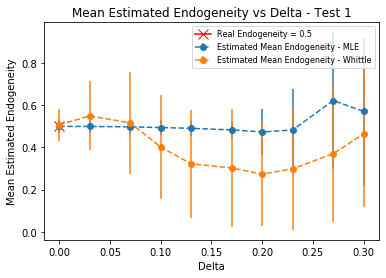

In [14]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()


for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_endogeneity = real_alpha/real_beta
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    #plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Mle")
    #plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Endogeneity"] , yerr = mean_estimated_parameters_current_test_mle["Std Estimated Endogeneity"] , fmt='--o', label = "Estimated Mean Endogeneity - MLE")
    plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Endogeneity"] , yerr = mean_estimated_parameters_current_test_whittle["Std Estimated Endogeneity"] , fmt='--o', label = "Estimated Mean Endogeneity - Whittle")
    plt.plot([0], [real_endogeneity], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Endogeneity = {real_endogeneity}", color = 'r')
    plt.title(f"Mean Estimated Endogeneity vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Endogeneity")
    plt.legend(loc =  1,  prop={"size":8})
    plt.show()

**Plotting mean of estimated $\beta$ for each test vs $\delta$**

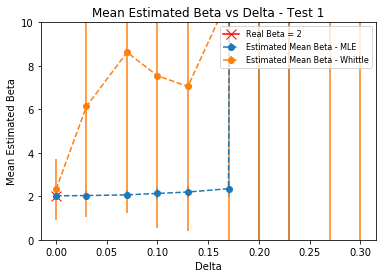

In [31]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    ##plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Mle")
    ##plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Beta"] , yerr = mean_estimated_parameters_current_test_mle["Std Estimated Beta"] , fmt='--o', label = "Estimated Mean Beta - MLE")
    plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"] , yerr = mean_estimated_parameters_current_test_whittle["Std Estimated Beta"] , fmt='--o', label = "Estimated Mean Beta - Whittle")
    plt.plot([0], [real_beta], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Beta = {real_beta}", color = 'r')
    plt.title(f"Mean Estimated Beta vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Beta")
    plt.legend(loc =  1,  prop={"size":8})
    plt.ylim(0,10)
    plt.show()



**Plotting mean of estimated $\lambda_{0}$ for each test vs $\delta$**

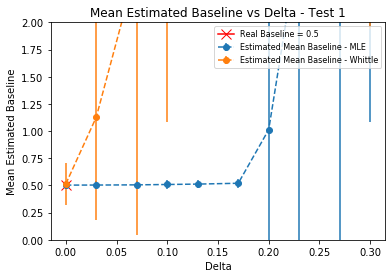

In [82]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()

for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    ##plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Mle")
    ##plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Alpha"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Baseline"] , yerr = mean_estimated_parameters_current_test_mle["Std Estimated Baseline"] , fmt='--o', label = "Estimated Mean Baseline - MLE")
    plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Baseline"][:30] , yerr = mean_estimated_parameters_current_test_whittle["Std Estimated Baseline"] , fmt='--o', label = "Estimated Mean Baseline - Whittle")
    plt.plot([0], [real_baseline], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Baseline = {real_baseline}", color = 'r')
    plt.title(f"Mean Estimated Baseline vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Baseline")
    plt.legend(loc =  1,  prop={"size":8})
    plt.ylim(0,2)
    plt.show()

**Plotting mean of estimated $\alpha$ for each test vs $\delta$**

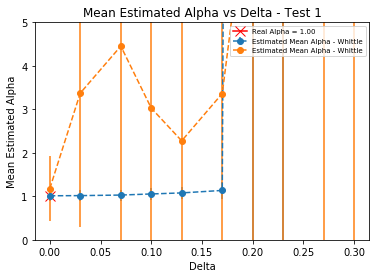

In [94]:
number_of_tests = hawkes_mle_data_experiment["Test Index"].nunique()


for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment[hawkes_mle_data_experiment["Test Index"] == i]["Real Baseline"].values[0]
    mean_estimated_parameters_current_test_mle = mean_estimated_parameters_by_test_per_delta_mle[mean_estimated_parameters_by_test_per_delta_mle["Test Index"] == i]
    mean_estimated_parameters_current_test_whittle = mean_estimated_parameters_by_test_per_delta_whittle[mean_estimated_parameters_by_test_per_delta_whittle["Test Index"] == i]
    ##plt.plot(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Endogeneity"]*mean_estimated_parameters_current_test_mle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - MLE")
    ##plt.plot(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Endogeneity"]*mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_mle["Delta"], mean_estimated_parameters_current_test_mle["Mean Estimated Endogeneity"]*mean_estimated_parameters_current_test_mle["Mean Estimated Beta"] , yerr = np.sqrt(np.multiply([n**2 for n in mean_estimated_parameters_current_test_mle["Std Estimated Endogeneity"]], [n**2 for n in mean_estimated_parameters_current_test_mle["Std Estimated Beta"]]) + np.multiply([n**2 for n in mean_estimated_parameters_current_test_mle["Std Estimated Endogeneity"]], [n**2 for n in mean_estimated_parameters_current_test_mle["Mean Estimated Beta"]]) + np.multiply([n**2 for n in mean_estimated_parameters_current_test_mle["Std Estimated Beta"]], [n**2 for n in mean_estimated_parameters_current_test_mle["Mean Estimated Endogeneity"]])) , fmt='--o', label = "Estimated Mean Alpha - Whittle")
    plt.errorbar(mean_estimated_parameters_current_test_whittle["Delta"], mean_estimated_parameters_current_test_whittle["Mean Estimated Endogeneity"]*mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"] , yerr = np.sqrt(np.multiply([n**2 for n in mean_estimated_parameters_current_test_whittle["Std Estimated Endogeneity"]], [n**2 for n in mean_estimated_parameters_current_test_whittle["Std Estimated Beta"]]) + np.multiply([n**2 for n in mean_estimated_parameters_current_test_whittle["Std Estimated Endogeneity"]], [n**2 for n in mean_estimated_parameters_current_test_whittle["Mean Estimated Beta"]]) + np.multiply([n**2 for n in mean_estimated_parameters_current_test_whittle["Std Estimated Beta"]], [n**2 for n in mean_estimated_parameters_current_test_whittle["Mean Estimated Endogeneity"]])) , fmt='--o', label = "Estimated Mean Alpha - Whittle")
    plt.plot([0], [real_alpha], marker = "x", linewidth = 1.5, markersize = 10, label = f"Real Alpha = {real_alpha:.2f}", color = 'r')
    plt.title(f"Mean Estimated Alpha vs Delta - Test {i}")
    plt.xlabel("Delta")
    plt.ylabel("Mean Estimated Alpha")
    plt.legend(loc =  1,  prop={"size":7})
    plt.ylim(0,5)
    plt.show()

## Studying the mean distribution of timestamps within $\delta$-bins

In [32]:
bin_mean_count = pd.read_csv("bin_mean_count.csv")
bin_mean_count.head()

,Test Index,Simulation Index,Delta,Mean Bin Count
0,1,1,0.03,0.029910
1,1,1,0.07,0.069793
2,1,1,0.10,0.099700
3,1,1,0.13,0.129615
4,1,1,0.17,0.169500


In [33]:
bin_mean_count.shape

(900, 4)

**Mean Bin Cout per $\delta$**

In [34]:
bin_mean_count_per_delta = bin_mean_count.groupby("Delta").mean()["Mean Bin Count"]

In [35]:
bin_mean_count_per_delta

Delta
0.03    0.030264
0.07    0.070494
0.10    0.100714
0.13    0.130933
0.17    0.171328
0.20    0.201428
0.23    0.231391
0.27    0.271633
0.30    0.301735
Name: Mean Bin Count, dtype: float64

Text(0.25, 0.2, '$\\alpha$ = 1.00')

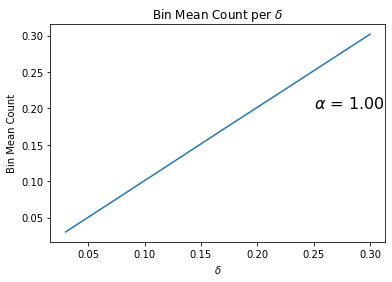

In [36]:
plt.plot(bin_mean_count["Delta"].unique(), bin_mean_count_per_delta)
plt.title(r"Bin Mean Count per $\delta$")
plt.ylabel("Bin Mean Count")
plt.xlabel(r"$\delta$")
plt.text(0.25, 0.2, r"$\alpha$ = {:.2f}".format(real_alpha), fontsize = 16)

**From theory, we know that the mean baseline per unit time is given by: $\overline{\lambda} = \frac{\lambda_{0}}{1 - \frac{\alpha}{\beta}}$:**

**Theoretical mean baseline:**

In [37]:
print(f"{real_baseline/(1 - (real_alpha/real_beta)):.2f}")

1.00


**Empirical mean baseline:**

In [38]:
print("{:.2f}".format(np.mean(bin_mean_count_per_delta/bin_mean_count["Delta"].unique())))

1.01


## Analyzing the fraction of timestamps per bin with respect to the total number of timestamps

In [39]:
bin_mean_count_histograms = pd.read_csv("bin_count_histograms.csv")

In [40]:
bin_mean_count_histograms.shape

(8757589, 4)

In [41]:
delta_values = sorted(set(bin_mean_count_histograms['Delta']))
number_of_simulations = len(set(bin_mean_count_histograms['Simulation Index']))
time_of_simulation = (bin_mean_count_histograms[bin_mean_count_histograms['Delta'] == delta_values[0]].count()[0]*delta_values[0])/number_of_simulations
time_of_simulation = math.ceil(time_of_simulation)

**Number of Simulations**

In [42]:
number_of_simulations

100

**Time of Simulation**

In [43]:
time_of_simulation

1000

**Generating mean histograms for each $\delta$ value**

In [44]:
mean_histograms_per_delta = []

for delta in delta_values:
    counts_associated_with_current_delta = bin_mean_count_histograms[bin_mean_count_histograms['Delta'] == delta]
    current_index = counts_associated_with_current_delta.index
    number_of_bins = int(time_of_simulation/delta)
    mean_histogram_for_current_delta = np.zeros(number_of_bins)
    for i in current_index:
        mean_histogram_for_current_delta[(i%number_of_bins)] += counts_associated_with_current_delta.loc[i]['Bin Count Histogram']
    mean_histogram_for_current_delta = mean_histogram_for_current_delta/number_of_simulations
    mean_histograms_per_delta.append(mean_histogram_for_current_delta)
    print(f"Mean histogram for delta {delta} is evaluated\n")

Mean histogram for delta 0.03 is evaluated

Mean histogram for delta 0.07 is evaluated

Mean histogram for delta 0.1 is evaluated

Mean histogram for delta 0.13 is evaluated

Mean histogram for delta 0.17 is evaluated

Mean histogram for delta 0.2 is evaluated

Mean histogram for delta 0.23 is evaluated

Mean histogram for delta 0.27 is evaluated

Mean histogram for delta 0.3 is evaluated



**Plotting Mean Histograms for each $\delta$ truncated time axis**

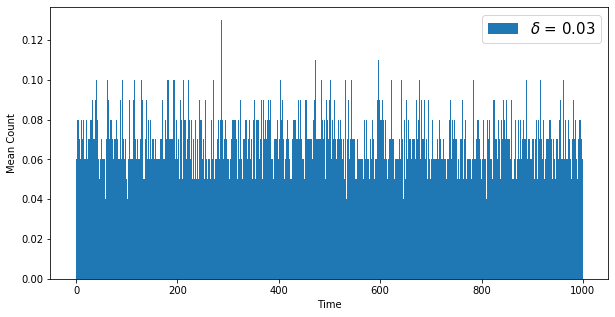

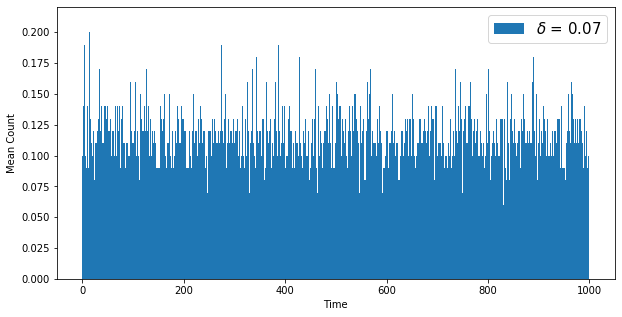

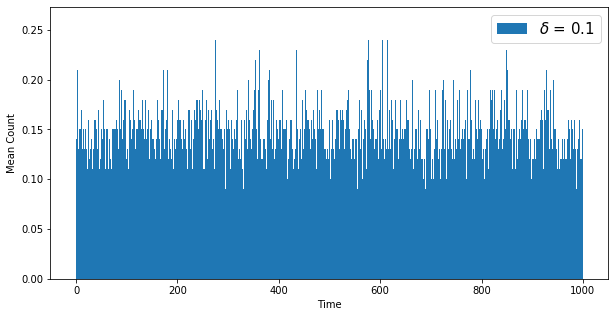

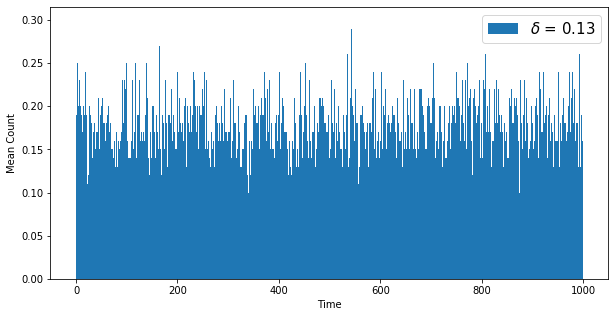

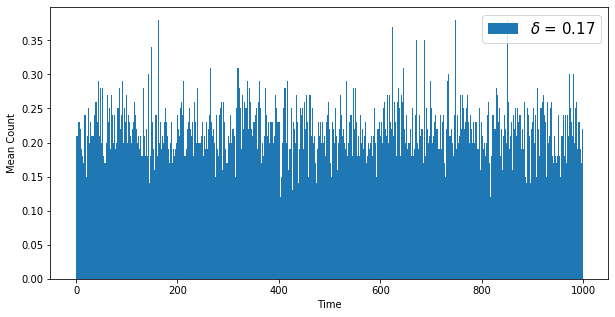

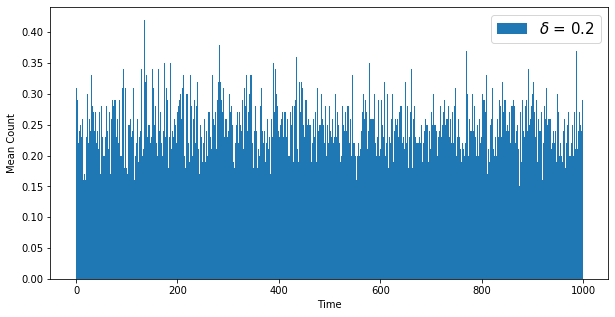

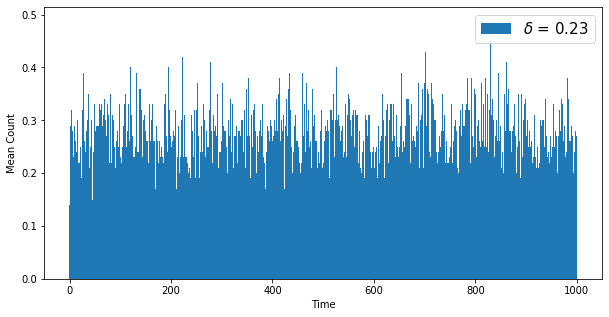

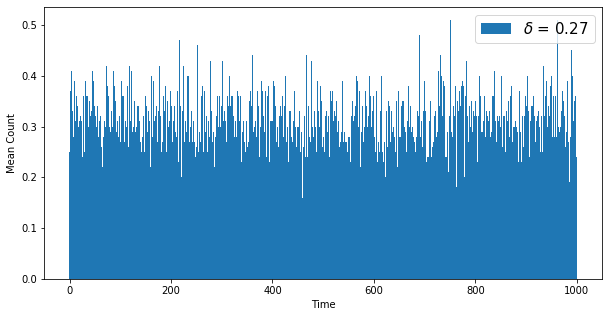

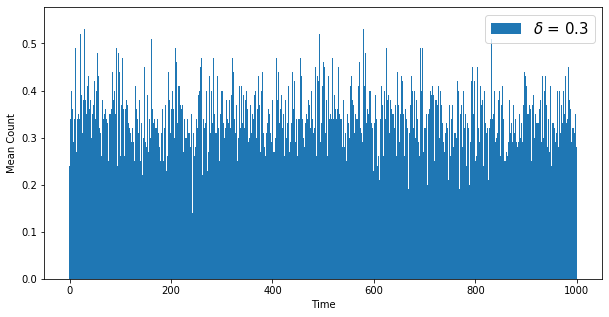

In [45]:
for i in range(0, len(delta_values)):
    plt.figure(figsize=(10,5))
    plt.bar(delta_values[i]*np.arange(0, len(mean_histograms_per_delta[i])), mean_histograms_per_delta[i], width =0.8, bottom=None, align='center', label = r"$\delta$ = {}".format(delta_values[i]))
    plt.xlabel("Time")
    plt.ylabel("Mean Count")
    plt.legend(loc = 1, prop={'size': 15})
    plt.show() 

**Plotting Relative (/total_timestamps) Mean Histograms for each $\delta$ truncated time axis**

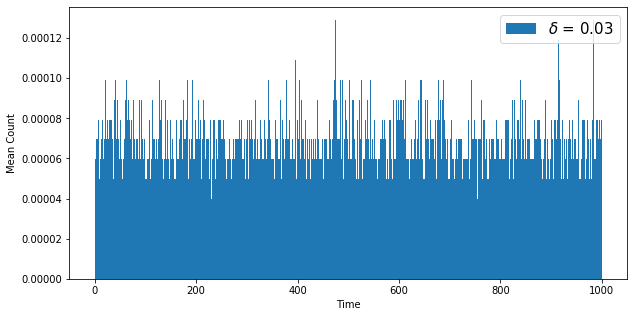

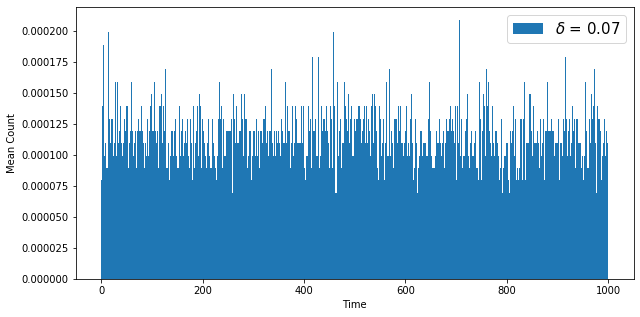

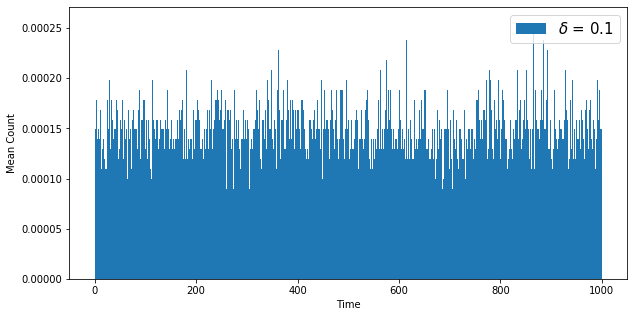

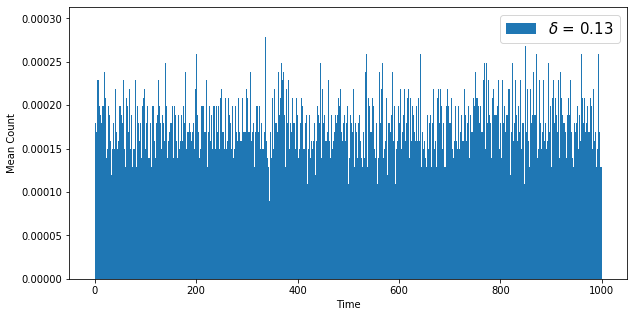

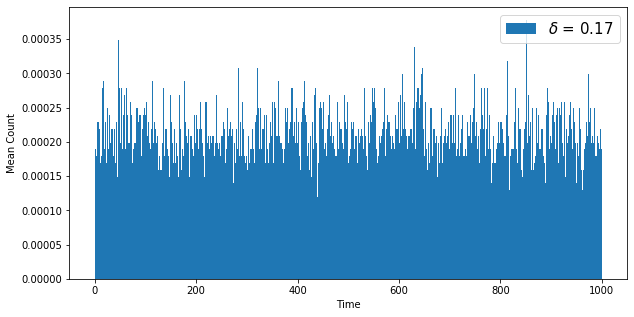

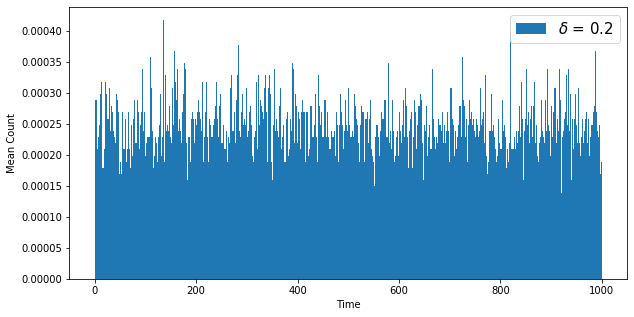

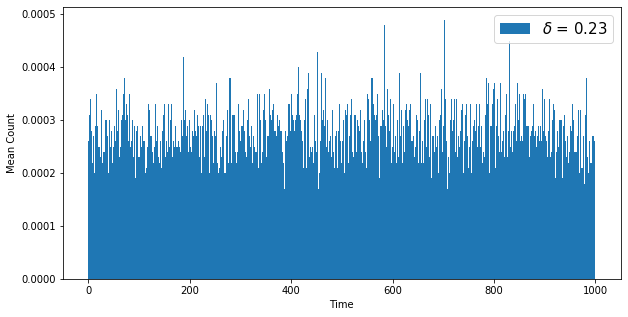

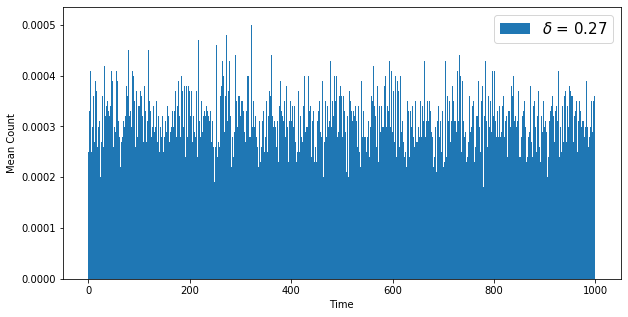

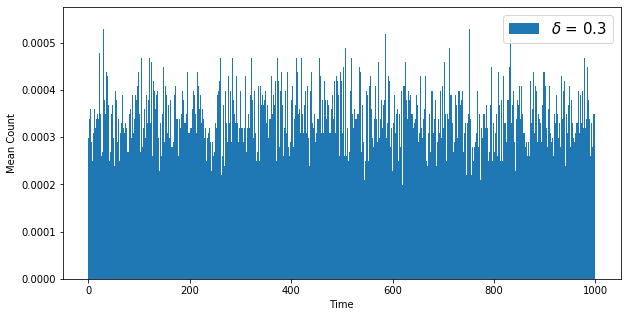

In [47]:
mean_relative_histograms_per_delta = []

for i in range(0, len(delta_values)):
    mean_relative_histograms_per_delta.append((mean_histograms_per_delta[i]/np.nansum(mean_histograms_per_delta[i])))
    

for i in range(0, len(delta_values)):
    plt.figure(figsize=(10,5))
    plt.bar(delta_values[i]*np.arange(0, len(mean_relative_histograms_per_delta[i])), mean_relative_histograms_per_delta[i], width =0.8, bottom=None, align='center', label = r"$\delta$ = {}".format(delta_values[i]))
    plt.xlabel("Time")
    plt.ylabel("Mean Count")
    plt.legend(loc = 1, prop={'size': 15})
    plt.show() 

**Plotting Relative (/total_timestamps) Mean Count EWM for each $\delta$ truncated time axis**

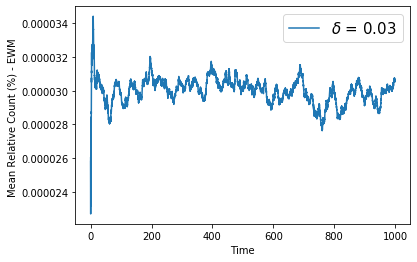

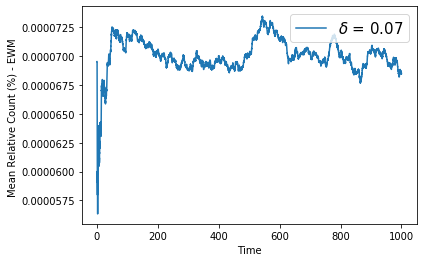

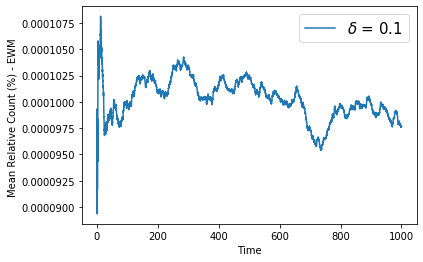

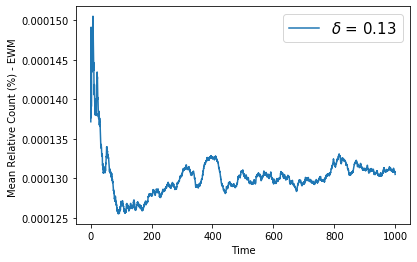

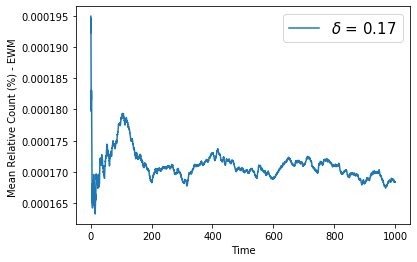

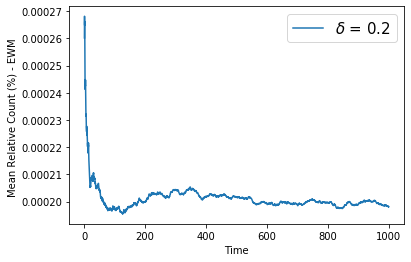

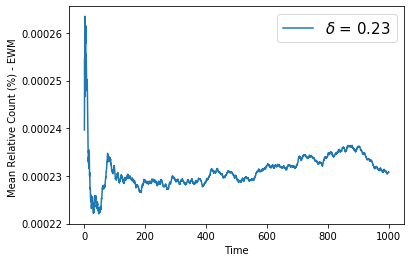

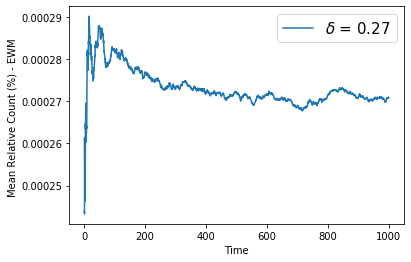

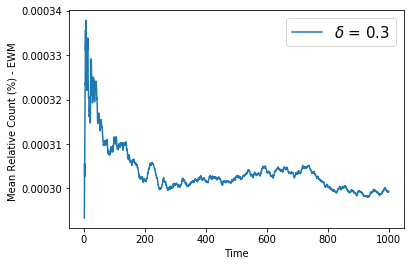

In [72]:
for i in range(0, len(delta_values)):
    plt.plot(delta_values[i]*np.arange(0, len(mean_relative_histograms_per_delta[i])),pd.DataFrame(mean_relative_histograms_per_delta[i]).ewm(min_periods = 5, alpha = 0.001).mean(), label = r"$\delta$ = {}".format(delta_values[i]))
    plt.xlabel("Time")
    plt.ylabel("Mean Relative Count (%) - EWM ")
    plt.legend(loc = 1, prop={'size': 15})
    plt.show()


## Testing for different $\alpha$

In [228]:
hawkes_mle_data_experiment_different_alphas = pd.read_csv("results_mle_different_alphas.csv")

In [229]:
number_of_tests = hawkes_mle_data_experiment_different_alphas["Test Index"].nunique()
from random import randint
colors = []
n = number_of_tests
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [230]:
mean_estimated_parameters_by_test_per_delta_mle_different_alphas  = return_mean_estimated_parameters_by_each_test_per_delta(hawkes_mle_data_experiment_different_alphas)

Deltas Values: [0.   0.03 0.07 0.1  0.13 0.17 0.2  0.23 0.27 0.3 ]


In [231]:
mean_estimated_parameters_by_test_per_delta_mle_different_alphas.head(5)

,Test Index,Delta,Mean Estimated Baseline,Mean Estimated Endogeneity,Mean Estimated Beta,Max Estimated Baseline,Max Estimated Endogeneity,Max Estimated Beta,Min Estimated Baseline,Min Estimated Endogeneity,Min Estimated Beta,Std Estimated Baseline,Std Estimated Endogeneity,Std Estimated Beta
0,1.0,0.00,0.993108,0.101662,10.802509,1.089508,0.153848,26.547909,0.904308,0.048674,3.821887,0.037353,0.022702,4.011266
1,1.0,0.03,1.196965,0.127295,4119.327272,5.024793,0.981861,39816.323610,0.657007,0.000100,4.155557,0.683456,0.134050,9921.229195
2,1.0,0.07,6.332835,0.310157,10697.303204,345.994900,0.999900,15920.385879,0.000100,0.009287,6.314330,34.394429,0.301639,3089.662010
3,1.0,0.10,3.110178,0.277354,7617.574272,12.683371,0.999900,10292.536633,0.064449,0.000100,1786.910550,3.040656,0.281514,1480.768041
4,1.0,0.13,4.175025,0.391107,5633.579113,15.070150,0.999900,7707.876462,0.000100,0.002423,540.106616,4.124347,0.319889,1328.911552


Number of tests: 99


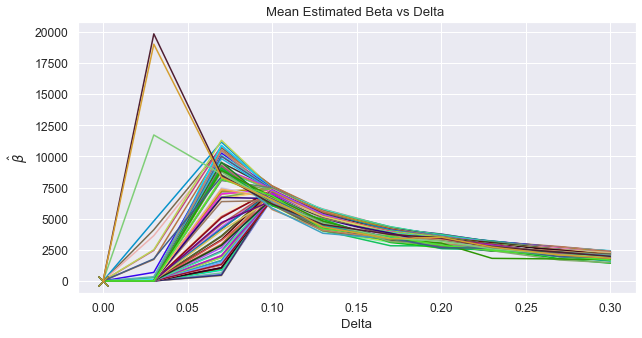

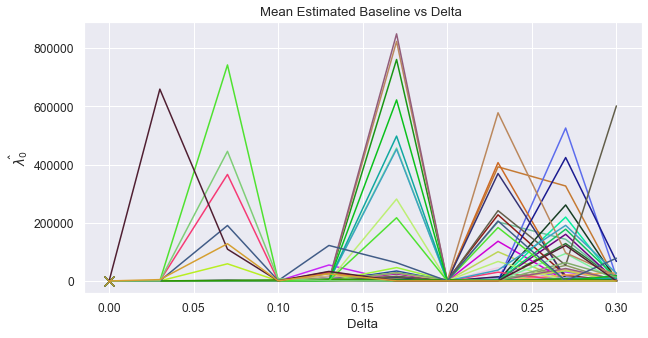

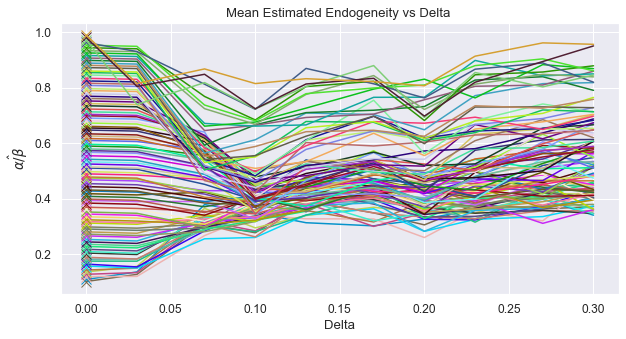

In [235]:
print(f"Number of tests: {number_of_tests}") 
alpha_vector = hawkes_mle_data_experiment_different_alphas["Real Alpha"].unique()
delta_vector = hawkes_mle_data_experiment_different_alphas["Delta"].unique()
variances_endogeneity_each_alpha = []
variances_alpha_each_alpha = []
variances_beta_each_alpha = []
variances_baseline_each_alpha = []

plt.figure(figsize=(10,5))
for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    mean_estimated_parameters_current_test_mle_different_alphas = mean_estimated_parameters_by_test_per_delta_mle_different_alphas[mean_estimated_parameters_by_test_per_delta_mle_different_alphas["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle_different_alphas["Delta"], mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Beta"], linewidth = 1.5, markersize = 10, label = r"$\alpha = {}$".format(real_alpha), color = colors[i-1])
    plt.plot([0], [real_beta], marker = "x", linewidth = 1.5, markersize = 10, color = colors[i-1])
    ##plt.legend(loc = 1,  prop={"size":8})
plt.title(f"Mean Estimated Beta vs Delta ")
plt.xlabel("Delta")
plt.ylabel(r"$\hat{\beta}$")
plt.show()

plt.figure(figsize=(10,5))
for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_baseline = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Baseline"].values[0] 
    mean_estimated_parameters_current_test_mle_different_alphas = mean_estimated_parameters_by_test_per_delta_mle_different_alphas[mean_estimated_parameters_by_test_per_delta_mle_different_alphas["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle_different_alphas["Delta"], mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Baseline"], linewidth = 1.5, markersize = 10, label = r"$\alpha = {}$".format(real_alpha), color = colors[i-1])
    plt.plot([0], [real_baseline], marker = "x", linewidth = 1.5, markersize = 10, color = colors[i-1])
    ##plt.legend(loc = 1,  prop={"size":8})
plt.title(f"Mean Estimated Baseline vs Delta ")
plt.xlabel("Delta")
plt.ylabel(r"$\hat{\lambda_{{0}}}$")
plt.show()

plt.figure(figsize=(10,5))
for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    real_endogeneity = real_alpha/real_beta
    mean_estimated_parameters_current_test_mle_different_alphas = mean_estimated_parameters_by_test_per_delta_mle_different_alphas[mean_estimated_parameters_by_test_per_delta_mle_different_alphas["Test Index"] == i]
    plt.plot(mean_estimated_parameters_current_test_mle_different_alphas["Delta"], mean_estimated_parameters_current_test_mle_different_alphas["Mean Estimated Endogeneity"], linewidth = 1.5, markersize = 10, label = r"$\alpha/\beta = {}$".format(real_endogeneity), color = colors[i-1])
    variances_endogeneity_each_alpha.append(mean_estimated_parameters_current_test_mle_different_alphas["Std Estimated Endogeneity"])
    plt.plot([0], [real_endogeneity], marker = "x", linewidth = 1.5, markersize = 10, color = colors[i-1])
    ##plt.legend(loc = 1,  prop={"size":8})
plt.title(f"Mean Estimated Endogeneity vs Delta ")
plt.xlabel("Delta")
plt.ylabel(r"$\hat{\alpha/\beta}$")
plt.show()

**Values of alpha tested**

In [236]:
alpha_vector

array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.55, 1.64, 1.73, 1.82, 1.91,
       2.  , 2.09, 2.18, 2.27, 2.36, 2.45, 2.55, 2.64, 2.73, 2.82, 2.91,
       3.  , 3.09, 3.18, 3.27, 3.36, 3.45, 3.55, 3.64, 3.73, 3.82, 3.91,
       4.  , 4.09, 4.18, 4.27, 4.36, 4.45, 4.55, 4.64, 4.73, 4.82, 4.91,
       5.  , 5.09, 5.18, 5.27, 5.36, 5.45, 5.55, 5.64, 5.73, 5.82, 5.91,
       6.  , 6.09, 6.18, 6.27, 6.36, 6.45, 6.55, 6.64, 6.73, 6.82, 6.91,
       7.  , 7.09, 7.18, 7.27, 7.36, 7.45, 7.55, 7.64, 7.73, 7.82, 7.91,
       8.  , 8.09, 8.18, 8.27, 8.36, 8.45, 8.55, 8.64, 8.73, 8.82, 8.91,
       9.  , 9.09, 9.18, 9.27, 9.36, 9.45, 9.55, 9.64, 9.73, 9.82, 9.91])

**Values of tested delta**

In [237]:
delta_vector

array([0.  , 0.03, 0.07, 0.1 , 0.13, 0.17, 0.2 , 0.23, 0.27, 0.3 ])

In [238]:
number_of_deltas = len(delta_vector)

In [239]:
bin_mean_count_different_alphas = pd.read_csv("bin_mean_count_different_alphas.csv")

In [240]:
bin_mean_count_per_delta_different_alphas = []
for i in range(1, number_of_tests + 1):
    bin_mean_count_different_alphas_test_i = bin_mean_count_different_alphas[bin_mean_count_different_alphas["Test Index"] == i]
    bin_mean_count_per_delta_different_alphas.append(bin_mean_count_different_alphas_test_i.groupby("Delta").mean()["Mean Bin Count"])

In [241]:
len(bin_mean_count_per_delta_different_alphas)

99

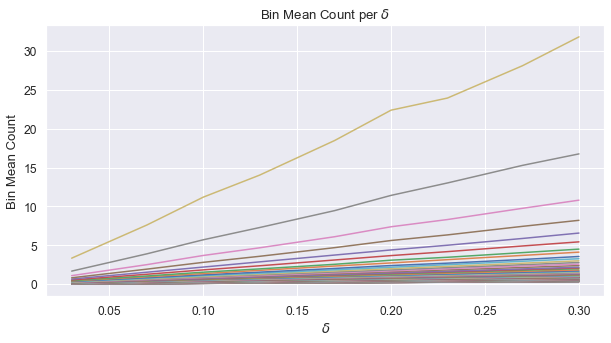

In [243]:
plt.figure(figsize=(10,5))
for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    plt.plot(bin_mean_count_different_alphas["Delta"].unique(), bin_mean_count_per_delta_different_alphas[i-1], label = r"$\alpha$ = {}".format(real_alpha))
plt.title(r"Bin Mean Count per $\delta$")
plt.ylabel("Bin Mean Count")
plt.xlabel(r"$\delta$")
##plt.legend()
plt.show()

**Theoretical Expected Values for Mean Intensity Rate**

In [244]:
for i in range(1, number_of_tests + 1):
    real_alpha = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Alpha"].values[0]
    real_beta = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Beta"].values[0]
    real_baseline = hawkes_mle_data_experiment_different_alphas[hawkes_mle_data_experiment_different_alphas["Test Index"] == i]["Real Baseline"].values[0]
    print(f"Test {i}: {real_baseline/(1 - (real_alpha/real_beta)):.2f}")


Test 1: 1.11
Test 2: 1.12
Test 3: 1.13
Test 4: 1.15
Test 5: 1.16
Test 6: 1.17
Test 7: 1.18
Test 8: 1.20
Test 9: 1.21
Test 10: 1.22
Test 11: 1.24
Test 12: 1.25
Test 13: 1.26
Test 14: 1.28
Test 15: 1.29
Test 16: 1.31
Test 17: 1.32
Test 18: 1.34
Test 19: 1.36
Test 20: 1.38
Test 21: 1.39
Test 22: 1.41
Test 23: 1.43
Test 24: 1.45
Test 25: 1.47
Test 26: 1.49
Test 27: 1.51
Test 28: 1.53
Test 29: 1.55
Test 30: 1.57
Test 31: 1.59
Test 32: 1.62
Test 33: 1.64
Test 34: 1.67
Test 35: 1.69
Test 36: 1.72
Test 37: 1.75
Test 38: 1.77
Test 39: 1.80
Test 40: 1.83
Test 41: 1.87
Test 42: 1.90
Test 43: 1.93
Test 44: 1.96
Test 45: 2.00
Test 46: 2.04
Test 47: 2.07
Test 48: 2.11
Test 49: 2.16
Test 50: 2.20
Test 51: 2.25
Test 52: 2.29
Test 53: 2.34
Test 54: 2.39
Test 55: 2.44
Test 56: 2.50
Test 57: 2.56
Test 58: 2.62
Test 59: 2.68
Test 60: 2.75
Test 61: 2.82
Test 62: 2.90
Test 63: 2.98
Test 64: 3.06
Test 65: 3.14
Test 66: 3.24
Test 67: 3.33
Test 68: 3.44
Test 69: 3.55
Test 70: 3.66
Test 71: 3.79
Test 72: 3.92
T

**Empirical Values for Mean Intensity Rate**

In [245]:
for i in range(1, number_of_tests + 1):
    print("{:.2f}".format(np.mean(bin_mean_count_per_delta_different_alphas[i-1]/bin_mean_count_different_alphas["Delta"].unique())))

1.11
1.12
1.13
1.14
1.16
1.17
1.18
1.20
1.21
1.22
1.23
1.25
1.26
1.28
1.29
1.31
1.33
1.33
1.36
1.37
1.40
1.40
1.43
1.45
1.46
1.48
1.50
1.53
1.54
1.57
1.59
1.62
1.65
1.67
1.69
1.73
1.77
1.75
1.80
1.83
1.88
1.90
1.92
1.96
2.00
2.05
2.07
2.12
2.14
2.20
2.24
2.32
2.37
2.38
2.45
2.48
2.57
2.63
2.67
2.74
2.83
2.89
2.98
3.05
3.15
3.25
3.33
3.41
3.48
3.62
3.80
3.92
4.06
4.22
4.36
4.55
4.76
4.94
5.26
5.48
5.73
6.11
6.59
6.98
7.27
7.99
8.60
9.25
10.01
10.90
11.90
13.71
15.18
18.26
21.98
27.68
36.30
56.32
108.32


## Trying to find a functional dependency for the delta of rupture - $\delta_{c}$

**Analyzing the variance of estimates in a heatmap**

In [246]:
heatmap_variance_endogeneity_data = pd.DataFrame(data = [], index = alpha_vector, columns = delta_vector, dtype= 'float64')

In [247]:
for i in range(0, number_of_tests):
    heatmap_variance_endogeneity_data.loc[alpha_vector[i]] = variances_endogeneity_each_alpha[i].tolist()

**Endogeneity's rupture heatmap: $\alpha$ vs $\delta$**

Text(0.5, 1, 'Std of $\\hat{\\frac{{\\alpha}}{{\\beta}}}$')

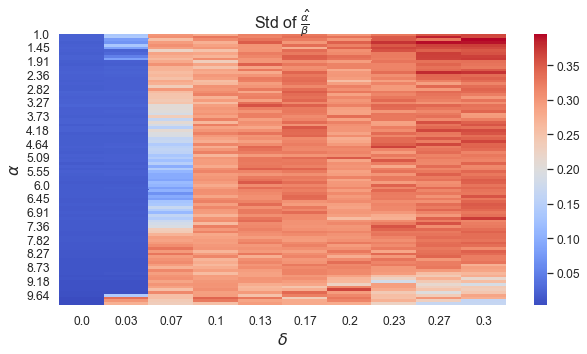

In [265]:
plt.figure(figsize=(10,5))
sns.heatmap(heatmap_variance_endogeneity_data, cmap = 'coolwarm',  annot = False, fmt=".2f")
plt.xlabel(r'$\delta$', fontsize = 16)
plt.ylabel(r'$\alpha$', fontsize = 16)
plt.title(r"Std of $\hat{\frac{{\alpha}}{{\beta}}}$", fontsize = 16)

In [262]:
reference_value = 0.2

In [263]:
deltas_of_ruptures = []

for i in range(0, number_of_tests):
    for j in range(0, number_of_deltas):
        if(heatmap_variance_endogeneity_data.iloc[i,j] >= reference_value):
            deltas_of_ruptures.append(delta_vector[j])
            break
        

**Functional dependency of $\delta_{c}$ vs $\alpha$ for a fixed $\beta$**

Text(0.5, 1.0, '$\\delta_{c}$($\\alpha)$')

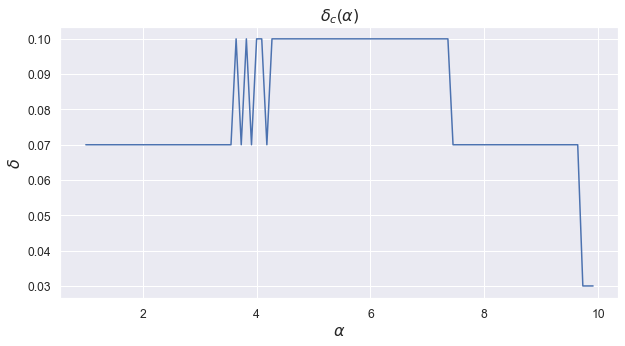

In [264]:
plt.figure(figsize=(10,5))
plt.plot(alpha_vector, deltas_of_ruptures)
plt.ylabel(r'$\delta$', fontsize = 16)
plt.xlabel(r'$\alpha$', fontsize = 16)
plt.title(r"$\delta_{c}$($\alpha)$", fontsize = 16)
